In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean plot style
sns.set_theme(style="whitegrid")

In [10]:
# Make sure 'student_exam_scores_12_13.csv' is in the same folder
filename = "student_exam_scores_12_13.csv"

try:
    df = pd.read_csv(filename)
    print("Dataset loaded successfully.")
    print("\nFirst 5 rows:")
    display(df.head())
except FileNotFoundError:
    print(f"Error: File '{filename}' not found. Please upload it.")
except Exception as e:
    print(f"An error occurred: {e}")
    

Dataset loaded successfully.

First 5 rows:


,student_id,hours_studied,sleep_hours,attendance_percent,Internal_marks,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


Number of samples: 200


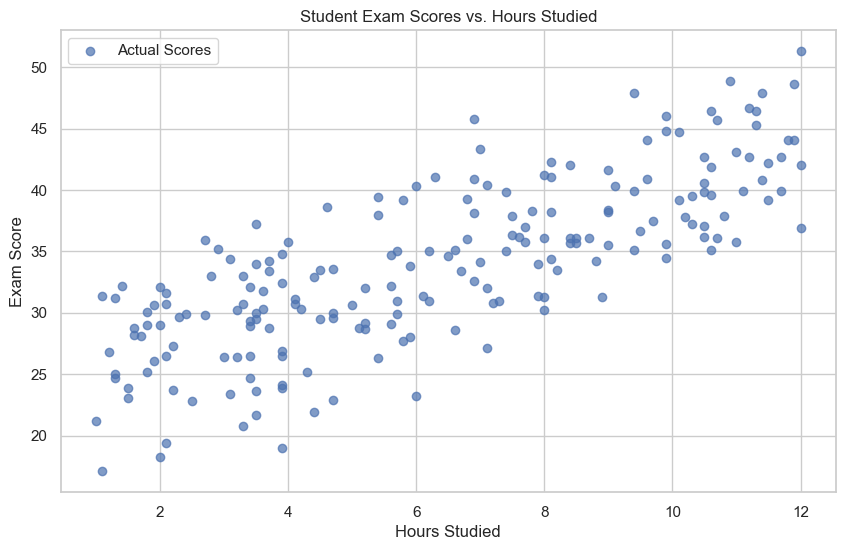

In [4]:
if 'df' in locals():
    # Extract features (X) and target (y) as numpy arrays
    # .values is used to get the raw numpy array, which is better for 'from scratch' math
    x = df['hours_studied'].values
    y = df['exam_score'].values
    n = len(x)  # Number of training examples

    print(f"Number of samples: {n}")
    
    # Visualize the raw data (EDA)
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.7, label='Actual Scores')
    plt.title('Student Exam Scores vs. Hours Studied')
    plt.xlabel('Hours Studied')
    plt.ylabel('Exam Score')
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
# --- Hyperparameters ---
alpha = 0.01  # Learning rate
epochs = 2000 # Number of iterations to train for

# --- Initialize parameters (slope and intercept) ---
m = 0.0
c = 0.0

# List to store the cost (MSE) at each epoch
cost_history = []

print("Starting Gradient Descent...")

# --- Gradient Descent Loop ---
for epoch in range(epochs):
    # 1. Calculate predictions (y = mx + c)
    y_pred = m * x + c
    
    # 2. Calculate the error (difference between predicted and actual)
    error = y_pred - y
    
    # 3. Calculate the cost (Mean Squared Error) for this epoch
    cost = (1/n) * np.sum(error**2)
    cost_history.append(cost)
    
    # 4. Calculate the gradients (partial derivatives)
    # Gradient for 'm' (slope)
    dm = (1/n) * np.sum(error * x)
    # Gradient for 'c' (intercept)
    dc = (1/n) * np.sum(error)
    
    # 5. Update the parameters using the learning rate
    m = m - alpha * dm
    c = c - alpha * dc
    
    # Optional: Print progress
    if (epoch + 1) % 200 == 0:
        print(f"Epoch {epoch+1}/{epochs} | Cost (MSE): {cost:.4f}")

print("\nTraining complete.")

Starting Gradient Descent...
Epoch 200/2000 | Cost (MSE): 66.9580
Epoch 400/2000 | Cost (MSE): 39.8674
Epoch 600/2000 | Cost (MSE): 27.8267
Epoch 800/2000 | Cost (MSE): 22.4752
Epoch 1000/2000 | Cost (MSE): 20.0966
Epoch 1200/2000 | Cost (MSE): 19.0394
Epoch 1400/2000 | Cost (MSE): 18.5696
Epoch 1600/2000 | Cost (MSE): 18.3607
Epoch 1800/2000 | Cost (MSE): 18.2679
Epoch 2000/2000 | Cost (MSE): 18.2267

Training complete.


In [6]:
if 'm' in locals():
    # 1. Make final predictions with the trained parameters
    y_pred_final = m * x + c
    
    # 2. Calculate Mean Squared Error (MSE) manually
    # (y_pred_final - y) is the error for each point
    # **2 squares the error
    # np.mean() averages the squared errors
    mse = np.mean((y_pred_final - y)**2)
    
    # 3. Calculate R-squared (R²) manually
    # ss_total: Total sum of squares (variance of y)
    ss_total = np.sum((y - np.mean(y))**2)
    # ss_residual: Residual sum of squares (variance explained by model error)
    ss_residual = np.sum((y - y_pred_final)**2)
    
    r2 = 1 - (ss_residual / ss_total)

    print("======================================================")
    print("📘 Linear Regression (1 Feature - 'from Scratch')")
    print("======================================================")
    print(f"Final Trained Equation:")
    print(f"exam_score = {m:.3f} * hours_studied + {c:.3f}")
    print("\nModel Performance:")
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"R-squared (R²) Score:   {r2:.3f}")

📘 Linear Regression (1 Feature - 'from Scratch')
Final Trained Equation:
exam_score = 1.685 * hours_studied + 23.219

Model Performance:
Mean Squared Error (MSE): 18.227
R-squared (R²) Score:   0.603


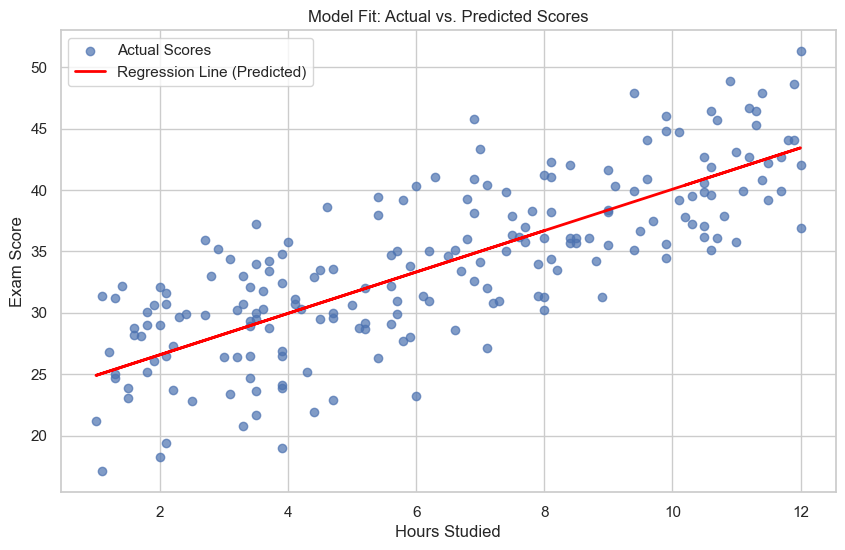

In [7]:
if 'y_pred_final' in locals():
    plt.figure(figsize=(10, 6))
    
    # Plot the original data points
    plt.scatter(x, y, alpha=0.7, label='Actual Scores')
    
    # Plot the regression line (our model's predictions)
    plt.plot(x, y_pred_final, color='red', linewidth=2, label='Regression Line (Predicted)')
    
    plt.title('Model Fit: Actual vs. Predicted Scores')
    plt.xlabel('Hours Studied')
    plt.ylabel('Exam Score')
    plt.legend()
    plt.grid(True)
    plt.show()

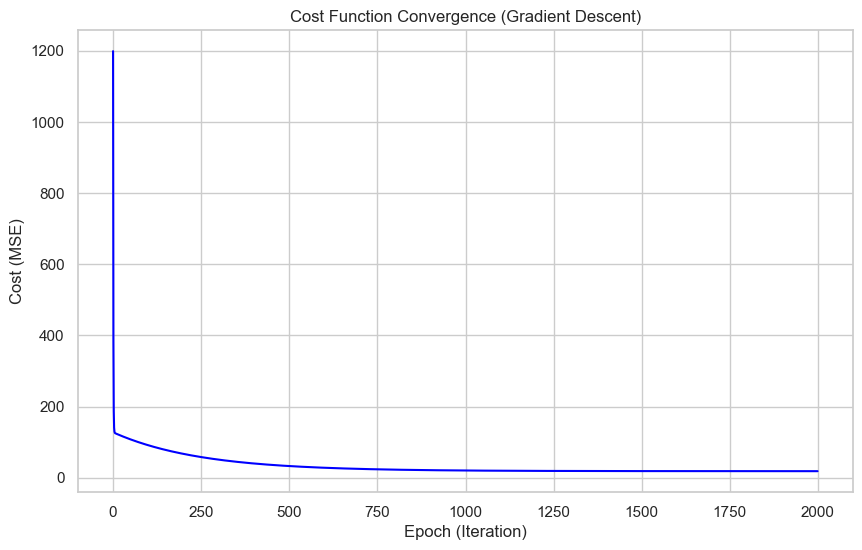

In [8]:
if 'cost_history' in locals():
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), cost_history, color='blue')
    plt.title('Cost Function Convergence (Gradient Descent)')
    plt.xlabel('Epoch (Iteration)')
    plt.ylabel('Cost (MSE)')
    plt.grid(True)
    plt.show()